# Análisis exploratorio de las carpetas de investigación de la FGJ de la Ciudad de México

Los datos fueron obtenidos desde el portal de datos abiertos de la CDMX y se pueden consultar en:
    
https://datos.cdmx.gob.mx/dataset/carpetas-de-investigacion-fgj-de-la-ciudad-de-mexico/resource/48fcb848-220c-4af0-839b-4fd8ac812c0f

Análisis hecho por: Rafael Ramo (rflramo@gmail.com) en Ciudad de México, Julio 31 de 2021.

# 1. Observación inicial de los datos

### Importar librerías necesarias para exploración

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

**Leer archivo CSV**

In [2]:
df = pd.read_csv("../data/carpetas_completa_junio_2021.csv")

/home/rflramo/virtualenvs/analytics/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Se levanta un warning debido a que existen columnas que tienen tipos de datos mezclados.

**Preprocesar algunos datos:**

1. Agregar a cada registro una columna con un valor de 1 para sumatorias  
2. Agregar un campo con fecha limpia sin timestamp  
3. Extraer en formato numérico la hora de los hechos del timestamp  
4. Extraer en formato numérico el día de la semana de los hechos desde el timestamp  
5. Extraer en formato numérico el mes de los hechos desde el timestamp  
6. Calcular un nuevo campo que contenga el año y mes de los hechos en formato YYYY-MM


In [3]:
df['registro'] = 1
df['fecha_hechos_clean'] = pd.to_datetime(df['fecha_hechos']).dt.date
df['hora_hechos'] = pd.to_datetime(df['fecha_hechos']).dt.hour
df['dow_hechos'] = pd.to_datetime(df['fecha_hechos']).dt.dayofweek
df['mes_hechos_numero'] = pd.to_datetime(df['fecha_hechos']).dt.month
#df['ao_mes_hechos'] = pd.to_datetime(df['fecha_hechos']).dt.strftime('%Y%m')
df['ao_mes_hechos'] = pd.to_datetime(df['fecha_hechos']).dt.to_period('M')
#df['ao_mes_hechos'] = pd.to_numeric(df['ao_mes_hechos'], errors = 'coerce')
#df['ao_mes_hechos'] = df['ao_mes_hechos'].astype(int)
#df['fecha_hechos_clean'] = df['fecha_hechos'].dt.date

In [4]:
df.head()

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo,registro,fecha_hechos_clean,hora_hechos,dow_hechos,mes_hechos_numero,ao_mes_hechos
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN,1,2016-01-31,22.0,6.0,1.0,2016-01
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN,1,2016-01-31,20.0,6.0,1.0,2016-01
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.356451,NaN,1,2016-02-01,0.0,0.0,2.0,2016-02
3,2016.0,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,GAVILLEROS,EMILIANO ZAPATA,IZTAPALAPA,NaN,-98.976379,19.331633,NaN,1,2016-01-31,22.0,6.0,1.0,2016-01
4,2015.0,Diciembre,2015-12-25 12:00:00,2016,Febrero,2016-02-01 02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,BENITO JUAREZ,NaN,-99.172189,19.387114,NaN,1,2015-12-25,12.0,4.0,12.0,2015-12


#### Revisar la cantidad de nulos, el tipo de campo y la cantidad de registros

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248924 entries, 0 to 1248923
Data columns (total 25 columns):
 #   Column                Non-Null Count    Dtype    
---  ------                --------------    -----    
 0   ao_hechos             1248489 non-null  float64  
 1   mes_hechos            1248489 non-null  object   
 2   fecha_hechos          1248489 non-null  object   
 3   ao_inicio             1248924 non-null  int64    
 4   mes_inicio            1248924 non-null  object   
 5   fecha_inicio          1248921 non-null  object   
 6   delito                1248924 non-null  object   
 7   fiscalia              1248922 non-null  object   
 8   agencia               1248924 non-null  object   
 9   unidad_investigacion  1248697 non-null  object   
 10  categoria_delito      1248924 non-null  object   
 11  calle_hechos          1245804 non-null  object   
 12  calle_hechos2         487246 non-null   object   
 13  colonia_hechos        1197664 non-null  object   
 14  al

Se observa lo siguiente:

- El dataset está compuesto de 1,248,924 registros
- La columna *tempo* no tiene datos
- La columna *calle_hechos2* tiene un 39% de campos no nulos (487,246 de 1,248,924)
- La columna *competencia* tiene un 14.8% de campos no nulos (184,845 de 1,248,924)
- Las columnas *ao_hechos*, *mes_hechos* y *ao_inicio* tienen un 99.9% de campos no nulos (1,248,489 de 1,248,924)
- La columna *alcaldia_hechos* tiene un 99.7% de campos no nulos (1,245,436 de 1,248,924)
- La columna *colonia_hechos* tiene un 95.8% de campos no nulos (1,197,664 de 1,248,924)
- Las columnas *latitud* y *longitud* tienen un 95.9% de campos no nulos (1,198,622 de 1,248,924)


### Graficar la columna competencia para entender qué datos contiene

<AxesSubplot:>

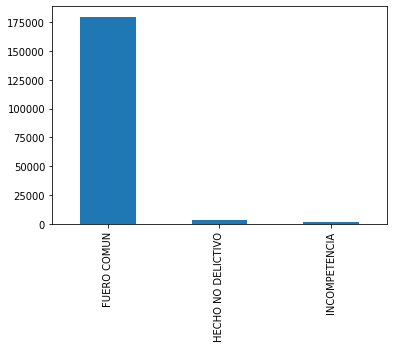

In [6]:
df['competencia'].value_counts().plot(kind = 'bar')

#### Se observa que la mayoría de registros son de tipo "Fuero común", sin embargo, dado que la columna presenta 85.2% de campos nulos, no es seguro intentar llenarla ni emplearla, esto para no causar sesgos innecesarios.

In [7]:
df.describe()

,ao_hechos,ao_inicio,longitud,latitud,tempo,registro,hora_hechos,dow_hechos,mes_hechos_numero
count,1.248489e+06,1.248924e+06,1.198622e+06,1.198622e+06,0.0,1248924.0,1.248489e+06,1.248489e+06,1.248489e+06
mean,2.018147e+03,2.018299e+03,-9.913723e+01,1.938728e+01,NaN,1.0,1.315076e+01,2.873983e+00,6.299074e+00
std,1.852414e+00,1.547680e+00,5.991893e-02,6.990362e-02,NaN,0.0,5.722519e+00,1.953431e+00,3.450031e+00
min,1.906000e+03,2.016000e+03,-1.002319e+02,1.909535e+01,NaN,1.0,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.017000e+03,2.017000e+03,-9.917559e+01,1.933966e+01,NaN,1.0,1.000000e+01,1.000000e+00,3.000000e+00
50%,2.018000e+03,2.018000e+03,-9.914212e+01,1.938981e+01,NaN,1.0,1.300000e+01,3.000000e+00,6.000000e+00
75%,2.019000e+03,2.020000e+03,-9.909973e+01,1.943771e+01,NaN,1.0,1.800000e+01,4.000000e+00,9.000000e+00
max,2.021000e+03,2.021000e+03,-9.894686e+01,1.958333e+01,NaN,1.0,2.300000e+01,6.000000e+00,1.200000e+01


## 1.1 Preguntas de esta sección para el área titular, dueña de los datos o de negocio:

1. ¿Por qué el campo tempo no tiene datos?
2. ¿Qué tipo de campo es?
3. ¿Por qué algunos campos no están llenos al 100%?
4. ¿El campo competencia a qué hace referencia?

# 2. Distribución de registros por año

### Se debe partir la gráfica en dos partes debido a que se registran casos de 1906 hasta 2021.

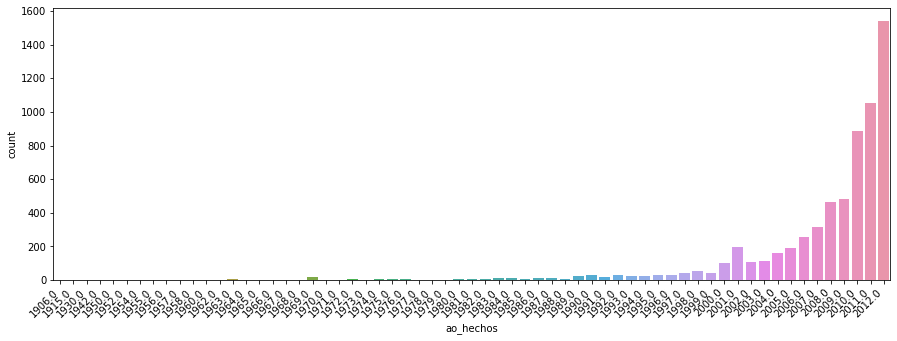

In [8]:
plt.figure(figsize=(15, 5))

chart = sns.countplot(
    data = df[df['ao_hechos'] < 2013],
    x = 'ao_hechos'
)

ax = chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

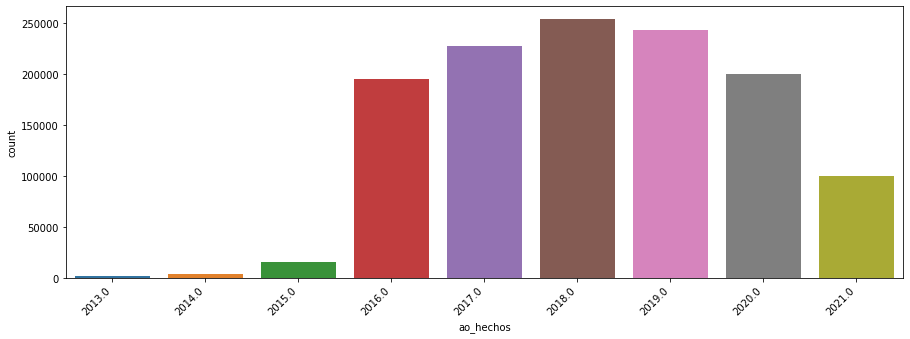

In [9]:
plt.figure(figsize=(15, 5))

chart = sns.countplot(
    data = df[df['ao_hechos'] >= 2013],
    x = 'ao_hechos'
)

ax = chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

### En estas gráficas se debe poner especial atención debido a que las escalas son diferentes entre sí. En la primera, la escala corre de 0 a 1,600 carpetas mientras que, para la segunda, de 0 a 250,000. Con estas gráficas se observa que la gran mayoría de casos se registran a partir de 2016.

### Calcular el porcentaje acumulado de carpetas por año de forma descendente

In [10]:
df['ao_hechos'].value_counts(normalize = True).sort_index(ascending = False).cumsum()*100

2021.0      8.056699
2020.0     24.069415
2019.0     43.564341
2018.0     63.888589
2017.0     82.081060
2016.0     97.694974
2015.0     98.971877
2014.0     99.313410
2013.0     99.487621
2012.0     99.610890
2011.0     99.695232
2010.0     99.766117
2009.0     99.804804
2008.0     99.841969
2007.0     99.867119
2006.0     99.887624
2005.0     99.903003
2004.0     99.916059
2003.0     99.925029
2002.0     99.933440
2001.0     99.949058
2000.0     99.957388
1999.0     99.960993
1998.0     99.965478
1997.0     99.968762
1996.0     99.971085
1995.0     99.973408
1994.0     99.975250
1993.0     99.977253
1992.0     99.979816
1991.0     99.981097
1990.0     99.983340
1989.0     99.985262
1988.0     99.985903
1987.0     99.987104
1986.0     99.988066
1985.0     99.988786
1984.0     99.989988
1983.0     99.991029
1982.0     99.991590
1981.0     99.992070
1980.0     99.992631
1979.0     99.992871
1978.0     99.993112
1977.0     99.993272
1976.0     99.993752
1975.0     99.994073
1974.0     99

### Se observa que entre 2013 y 2021 se acumula el 99.48% del total, es decir, 1,242,092 casos de 1,248,489

## 2.1 Preguntas de esta sección para el área titular, dueña de los datos o de negocio:

1. ¿Por qué el registro es tan bajo en años anteriores a 2016?
2. Aunque podría ser obvio que no, ¿El archivo cuenta con todos los casos registrados?
3. Con la respuesta anterior, ¿Hubo un incremento de carpetas de investigación a partir de 2014 o lo que se observa en los datos es un subregistro?

# 3. Temporalidad y estacionalidad de los casos

## Graficando las horas del día en que se presentan los casos

<AxesSubplot:>

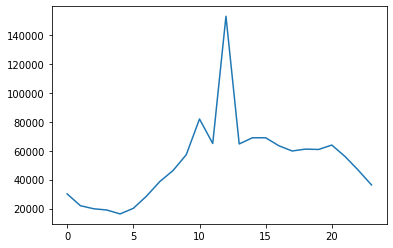

In [11]:
df['hora_hechos'].value_counts().sort_index().plot()

#### Existe un pico de registros a las 12 horas del día, puede deberse a que el registro se hace a esa hora cuando no se conoce la hora exacta del delito o efectivamente se trata de la hora máxima de actividad de casos.

## Graficando los días de la semana en que se presentan los casos

<AxesSubplot:>

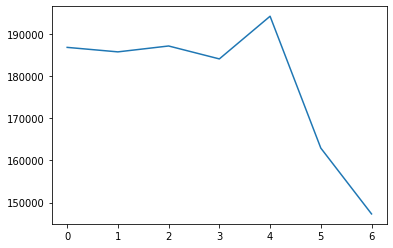

In [12]:
df['dow_hechos'].value_counts().sort_index().plot()

#### Tomando como base el paŕametro weekday donde Lunes = 0 y Domingo = 6, se observa que la tendencia es constante de Lunes a Jueves y tiene un incremento notable los días Viernes para decrecer en Sábado y registrar el mínimo en Domingo

## Graficando los meses del año en que se presentan los casos

<AxesSubplot:>

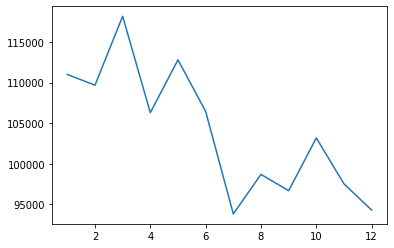

In [13]:
df['mes_hechos_numero'].value_counts().sort_index().plot()

#### Tomando como base el paŕametro month donde Enero = 1 y Diciembre = 12, se observa una tendecia creciente desde Enero con el máximo global de casos ubicado en el mes de Marzo, posterior a eso, adopta una tendencia decreciente con máximos locales en Mayo y Octubre. Julio y Diciembre son los meses menos activos del año.

In [14]:
#df['ao_mes_hechos'].value_counts().sort_index()

## 3.1 Preguntas de esta sección para el área titular, dueña de los datos o de negocio:
1. ¿A qué se debe que los registros crecen tanto a las 12 horas del día?
2. ¿Realmente existe una menor actividad los días Sábado o Domingo o efectivamente hay menos casos esos días?

# 4. Exploración de los delitos

## Cantidad de delitos únicos en la muestra

In [15]:
df['delito'].nunique()

345

### Se tienen 345 delitos distintos en la muestra de 1,248,924 registros

## Observar la cantidad de registros de los 20 delitos de mayor ocurrencia

In [16]:
#df['delito'].value_counts(normalize = True).cumsum()*100

In [17]:
df['delito'].value_counts().rename_axis('delitos').reset_index(name = 'ocurrencias').head(20)

,delitos,ocurrencias
0,VIOLENCIA FAMILIAR,129056
1,FRAUDE,76975
2,ROBO DE OBJETOS,72807
3,AMENAZAS,67458
4,ROBO A NEGOCIO SIN VIOLENCIA,66809
5,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,61909
6,DENUNCIA DE HECHOS,40156
7,ROBO DE ACCESORIOS DE AUTO,39709
8,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,34397
9,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,32204


### Se observa que el delito de mayor ocurrencia es, lametablemente, violencia familiar.

## Porcentaje de los 20 delitos de mayor ocurrencia

In [18]:
df['delito'].value_counts(normalize = True).rename_axis('delitos').reset_index(name = 'ocurrencias').head(20)

,delitos,ocurrencias
0,VIOLENCIA FAMILIAR,0.103334
1,FRAUDE,0.061633
2,ROBO DE OBJETOS,0.058296
3,AMENAZAS,0.054013
4,ROBO A NEGOCIO SIN VIOLENCIA,0.053493
5,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,0.049570
6,DENUNCIA DE HECHOS,0.032152
7,ROBO DE ACCESORIOS DE AUTO,0.031795
8,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,0.027541
9,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,0.025785


### Se observa que el veinteavo delito con más ocurrencias es *usurpación de identidad* y equivale al 1.2% de la muestra total.

## Calcular el porcentaje acumulado de acuerdo con los 25 delitos de mayor ocurrencia

In [19]:
df['delito'].value_counts(normalize = True).cumsum().rename_axis('delitos').reset_index(name='pct_acumulado').head(25)

,delitos,pct_acumulado
0,VIOLENCIA FAMILIAR,0.103334
1,FRAUDE,0.164967
2,ROBO DE OBJETOS,0.223263
3,AMENAZAS,0.277275
4,ROBO A NEGOCIO SIN VIOLENCIA,0.330769
5,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,0.380339
6,DENUNCIA DE HECHOS,0.412491
7,ROBO DE ACCESORIOS DE AUTO,0.444286
8,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,0.471827
9,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,0.497612


### De este dato se concluye que solamente 25 delitos componen a poco más del 70% de la muestra. Esto quiere decir que los restantes 325 delitos encontrados constituyen menos de 30% de la muestra. 

### Por tanto, el análisis de tendencias de los delitos se centrará en estos 25 delitos de mayor ocurrencia dado que los restantes 325 aparecen muy poco de forma individual (menor o igual a 1% de la muestra) y son de baja ocurrencia.

# 5. Análisis de tendencia de delitos

### Guardar los 25 delitos con más ocurrencia en una lista

In [20]:
df_delitos_mas_ocurrencia = df['delito'].value_counts(normalize = True).cumsum().rename_axis('delitos').reset_index(name='pct_acumulado').head(25)
delitos_mas_ocurrencia = df_delitos_mas_ocurrencia['delitos'].values.tolist()

In [21]:
print(delitos_mas_ocurrencia)

['VIOLENCIA FAMILIAR', 'FRAUDE', 'ROBO DE OBJETOS', 'AMENAZAS', 'ROBO A NEGOCIO SIN VIOLENCIA', 'ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA', 'DENUNCIA DE HECHOS', 'ROBO DE ACCESORIOS DE AUTO', 'ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO', 'ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA', 'ROBO A CASA HABITACION SIN VIOLENCIA', 'ABUSO DE CONFIANZA', 'DESPOJO', 'FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO', 'NARCOMENUDEO POSESION SIMPLE', 'DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL', 'ROBO A NEGOCIO CON VIOLENCIA', 'ABUSO SEXUAL', 'LESIONES INTENCIONALES POR GOLPES', 'USURPACIÓN DE IDENTIDAD', 'LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION', 'ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA', 'ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA', 'DAÑO EN PROPIEDAD AJENA INTENCIONAL', 'ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VIOLENCIA']


### Crear una tabla agregada de delitos por mes y año

In [22]:
agregacion_delitos_mes_ao = pd.DataFrame({'count' : df.groupby(['ao_mes_hechos','delito']).size()}).reset_index()
agregacion_delitos_mes_ao.tail(10)

,ao_mes_hechos,delito,count
18838,2021-06,USO DE DOCUMENTO FALSO,4
18839,2021-06,USO INDEBIDO DE ATRIBUCIONES Y FACULTADES,3
18840,2021-06,USURPACION DE PROFESION,1
18841,2021-06,USURPACIÓN DE IDENTIDAD,156
18842,2021-06,VIOLACION,71
18843,2021-06,VIOLACION DE CORRESPONDENCIA,2
18844,2021-06,VIOLACION DE LA INTIMIDAD,1
18845,2021-06,VIOLACION EQUIPARADA,38
18846,2021-06,VIOLACION TUMULTUARIA,4
18847,2021-06,VIOLENCIA FAMILIAR,2352


In [23]:
agregacion_delitos_mes_ao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18848 entries, 0 to 18847
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype    
---  ------         --------------  -----    
 0   ao_mes_hechos  18848 non-null  period[M]
 1   delito         18848 non-null  object   
 2   count          18848 non-null  int64    
dtypes: int64(1), object(1), period[M](1)
memory usage: 441.9+ KB


### Crear matriz de delitos por mes

#### La tabla que se va a crear permite conocer la aparición de cada delito en los meses del año. En caso de que un delito no figure en un mes determinado, el conteo se colocará como NaN.

In [24]:
delitos_wide = agregacion_delitos_mes_ao.pivot('ao_mes_hechos', 'delito', 'count')
delitos_wide.tail(24)

delito,ABANDONO DE PERSONA,ABORTO,ABUSO DE AUTORIDAD,ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA,ABUSO DE CONFIANZA,ABUSO SEXUAL,ACOSO SEXUAL,ACOSO SEXUAL AGRAVADO EN CONTRA DE MENORES,ALLANAMIENTO DE MORADA,"ALLANAMIENTO DE MORADA, DESPACHO, OFICINA O ESTABLECIMIENTO MERCANTIL",AMENAZAS,ASOCIACION DELICTUOSA,ATAQUE A LAS VIAS DE COMUNICACION (DAÑO A VIAS O MEDIOS DE TRANSPORTE),ATAQUE A LAS VIAS GENERALES DE COMUNICACIÓN,ATAQUES A LA PAZ PUBLICA,BIGAMIA,CALUMNIAS,CAMBIO DE USO DE SUELO,COACCION DE SERVIDORES PUBLICOS,COALICIÓN DE SERVIDORES PÚBLICOS,COBRANZA ILEGITIMA,COHECHO,CONCUSION,CONTAGIO VENERERO,CONTAMINACIÓN O RESIDUOS,CONTRA EL CUMPLIMIENTO DE LA OBLIGACION ALIMENTARIA,CONTRA EL ESTADO CIVIL,CONTRA FUNCIONARIOS PUBLICOS,CONTRA LA INTIMIDAD SEXUAL,CONTRA LA LEY GENERAL DE EXPLOSIVOS,CORRUPCION DE MENORES,CORRUPCION DE MENORES E INCAPACES,CORRUPCIÓN DE PERSONAS MENORES DE EDAD O PERSONAS QUE NO TENGAN CAPACIDAD PARA COMPRENDER EL SIGNIFICADO DEL HECHO O DE PERSONAS QUE NO TENGAN CAPACIDAD DE RESISTIR LA CONDUCTA,DAÑO EN PROPIEDAD AJENA CULPOSA,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A BIENES INMUEBLES,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A VIAS DE COMUNICACION,DAÑO EN PROPIEDAD AJENA INTENCIONAL,DAÑO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL,DAÑO EN PROPIEDAD AJENA INTENCIONAL A BIENES INMUEBLES,DAÑO EN PROPIEDAD AJENA INTENCIONAL A CASA HABITACION,DAÑO EN PROPIEDAD AJENA INTENCIONAL A NEGOCIO,DAÑO EN PROPIEDAD AJENA INTENCIONAL A VIAS DE COMUNICACION,"DAÑO SUELO (ACTIVIDAD, INVASIÓN O EXTRACCIÓN)",DDH ANONIMAS,DDH CERESO,DDH FDS,DDH FRVT,DDH INCOMPETENCIA,DDH OFICIO COLABORACION,DDH OTRAS MATERIAS,DDH REDES,DDH RELACIONADAS,DDH SIN DATOS,DELITOS AMBIENTALES,DELITOS CONTRA LA SALUD,DELITOS DE ABOGADOS PATRONOS Y LITIGANTES,"DELITOS DE ABOGADOS, PATRONOS, LITIGANTES Y ASESORES JURIDICOS",DELITOS ELECTORALES,DENUNCIA DE HECHOS,DENUNCIA DE HECHOS POR ROBO DE CELULAR,DESACATO,DESAPARICION FORZADA DE PERSONAS,DESOBEDENCIA DE PARTICULARES,DESOBEDIENCIA Y RESISTENCIA DE PARTICULARES,DESPOJO,DIFAMACION,DISCRIMINACION,DISPAROS DE ARMA DE FUEGO,EJERCICIO ABUSIVO DE FUNCIONES,EJERCICIO ILEGAL Y ABANDONO DEL SERVICIO PUBLICO,EJERCICIO INDEBIDO DEL PROPIO DER.,EJERCICIO INDEBIDO DEL SERVIDOR PUBLICO,ENCUBRIMIENTO,ENCUBRIMIENTO POR FAVORECIMIENTO,ENCUBRIMIENTO POR FAVORECIMIENTO Y RECEPTACIÓN,ENRIQUECIMIENTO ILICITO,ENTREGA ILEGITIMA DE UN MENOR,ESTUPRO,EVASION DE PRESOS,EXHORTOS,EXPLOTACIÓN DE MENOR O DISCAPACITADO,"EXPLOTACIÓN LABORAL DE MENORES, PERSONAS CON DISCAPACIDAD FÍSICA O MENTAL Y ADULTOS MAYORES",EXPOSICION DE MENORES,EXTORSION,"FABRICACION, COMERCIALIZACION Y USO INDEBIDO DE INSIGNIAS Y UNIFORMES",FALSEDAD ANTE AUTORIDADES,FALSEDAD DE DECLARACIONES,FALSIFICACION DE DOCUMENTOS,"FALSIFICACION DE SELLOS, MARCAS, LLAVES Y OTROS",FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO,FALSIFICACION O ALTERACION Y USO INDEBIDO DE DOCUMENTOS,"FALSIFICACIÓN DE SELLOS, MARCAS, LLAVES, CUÑOS, TROQUELES, CONTRASEÑAS Y OTROS",FEMINICIDIO,FEMINICIDIO POR ARMA BLANCA,FEMINICIDIO POR DISPARO DE ARMA DE FUEGO,FEMINICIDIO POR GOLPES,FRAUDE,GESTIÓN AMBIENTAL,HOMICIDIO CULPOSO,HOMICIDIO CULPOSO CON EXCLUYENTES DE RESPONSABILIDAD,HOMICIDIO CULPOSO FUERA DEL D.F (ATROPELLADO),HOMICIDIO CULPOSO FUERA DEL D.F (COLISION),HOMICIDIO CULPOSO POR ARMA DE FUEGO,HOMICIDIO CULPOSO POR INSTRUMENTO PUNZO CORTANTE,HOMICIDIO CULPOSO POR TRÁNSITO VEHICULAR,HOMICIDIO CULPOSO POR TRÁNSITO VEHICULAR (ATROPELLADO),HOMICIDIO CULPOSO POR TRÁNSITO VEHICULAR (CAIDA),HOMICIDIO CULPOSO POR TRÁNSITO VEHICULAR (COLISION),HOMICIDIO DOLOSO,HOMICIDIO INTENCIONAL Y ROBO DE VEHICULO,HOMICIDIO POR AHORCAMIENTO,HOMICIDIO POR ARMA BLANCA,HOMICIDIO POR ARMA DE FUEGO,HOMICIDIO POR GOLPES,HOMICIDIOS INTENCIONALES (OTROS),INCESTO,"INHUMACION, EXHUMACION Y RESPETO A LOS CADAVERES O RESTOS HUMANOS",INHUMACIONES Y/O EXHUMACIONES,INSOLVENCIA ALIMENTARIA,INTIMID

### De la parte 2 del análisis (Temporalidad y estacionalidad de los datos) se concluyó que entre 2013 y 2021 se acumula el 99.48% de las carpetas. Por esa razón, se discriminan los registros anteriores a Enero de 2013. Sin embargo es necesario recalcar que, de la misma sección, se presume que no se encuentran todos los registros presentes ya que en 2015 se tenían menos de 5,000 carpetas y en 2016 se tienen casi 200,000. Por esa razón, las tendencias se deben considerar a partir de 2016.

In [25]:
delitos_wide_latest = delitos_wide[delitos_wide.index > '2012-12']

<AxesSubplot:xlabel='ao_mes_hechos'>

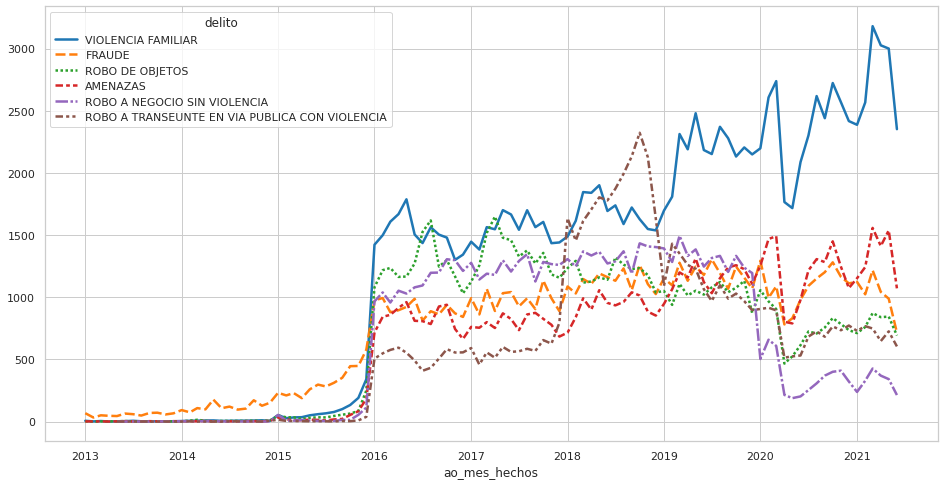

In [26]:
sns.set_style('whitegrid')
sns.despine()
sns.set_context('notebook', font_scale = 1, rc={"lines.linewidth": 2.5})
fig = plt.gcf()
fig.set_size_inches(16, 8)
sns.lineplot(data = delitos_wide_latest[delitos_mas_ocurrencia[0:6]].to_timestamp())
#plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left')

## Observaciones de la gráfica:

1. El delito de **violencia familiar** tiene una tendencia creciente.
2. El delito de **robo a transeunte en via publica con violencia** creció fuertemente a principios de 2018 y cayó a inicios de 2019. Ha continuado su tendencia decreciente con una caída durante 2020 que muy probablemente sea a causa de la contigencia sanitaria.
3. El delito de **robo a negocio sin violencia** tenía un comportamiento estable desde 2016 y se mantuvo a lo largo de 2017, 2018 y casi todo 2019. A finales de 2019 comienza un decremento muy marcado y llega a su mímimo global alrededor de Marzo 2020.
4. El delito de **robo de objetos** tiene una tendencia ligeramente decreciente.
5. El delito de **amenazas** parece tener una tendencia ligeramente creciente.
6. El delito de **fraude** parece tener una tendencia estable.
7. Todos los delitos presentan una caída durante Marzo 2020. Atribuible a la contingencia sanitaria.

<AxesSubplot:xlabel='ao_mes_hechos'>

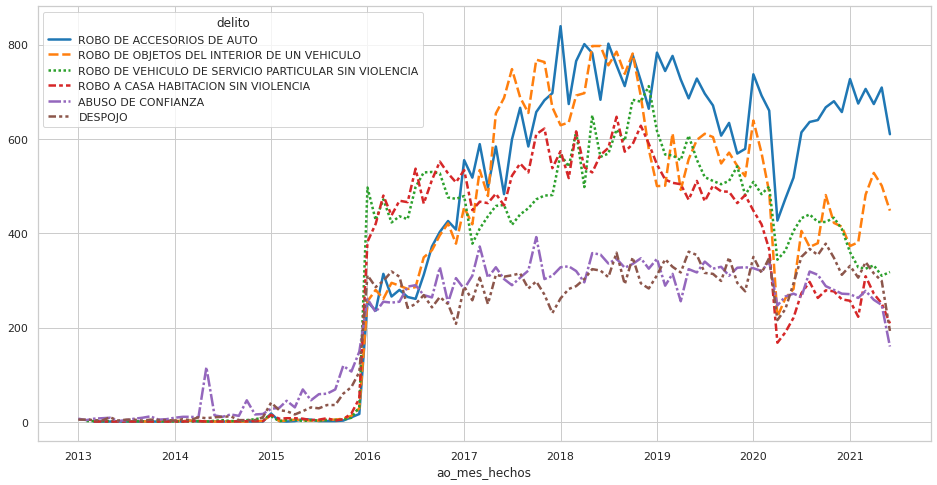

In [27]:
fig = plt.gcf()
fig.set_size_inches(16, 8)
sns.lineplot(data = delitos_wide_latest[delitos_mas_ocurrencia[7:13]].to_timestamp())
#plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left')

## Observaciones de la gráfica:

1. El delito de **robo de accesorios de auto** alcanzó sus máximos durante 2018 para comenzar a descender a finales de 2019. A finales de 2020 volvió a crecer para colocarse a sus niveles de 2018.
2. El delito de **robo de artículos del interior de un vehículo** creció fuertemente a principios desde 2016 y comenzó a caer a finales de 2018. Se estabilizó durante 2019 y cayó durante Marzo 2020. Muestra tendencia creciente desde entonces.
3. El delito de **robo de vehículo de servicio particular sin violencia** creció desde 2016 para comenzar a caer a finales de 2019. Mantiene tendencia decreciente desde entonces.
4. El delito de **robo a casa habitación sin violencia** mantenía una tendencia ligeramente creciente desde 2016 y comenzó a descender a finales de 2019. Tiene su mayor caída durante Marzo 2020 y presenta tendencia constante desde entonces.
5. Los delitos de **abuso de confianza** y **despojo** mantienen la misma tendencia desde 2016.
6. Todos los delitos presentan una caída durante Marzo 2020. Atribuible a la contingencia sanitaria.

<AxesSubplot:xlabel='ao_mes_hechos'>

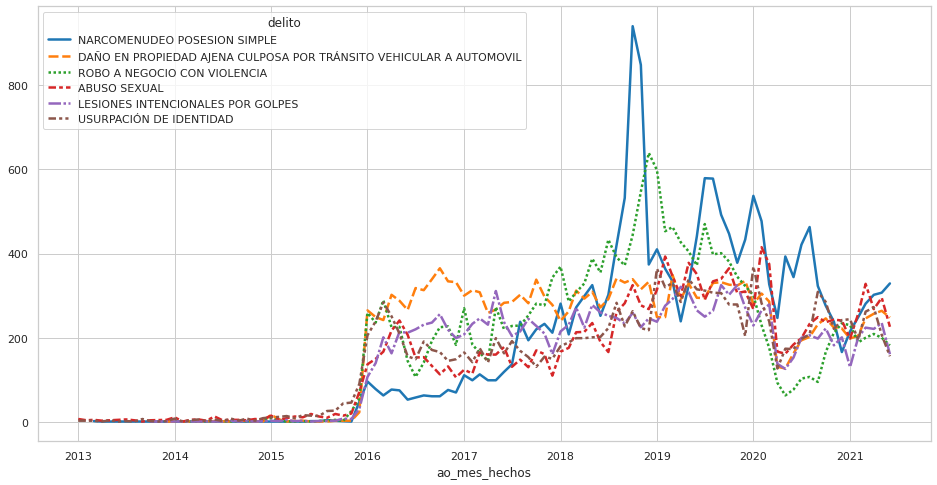

In [28]:
fig = plt.gcf()
fig.set_size_inches(16, 8)
sns.lineplot(data = delitos_wide_latest[delitos_mas_ocurrencia[14:20]].to_timestamp())
#plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left')

## Observaciones de la gráfica:

1. El delito de **narcomenudeo posesión simple** tuvo un crecimiento acelerado con un pico sumamente marcado a finales de 2018. Desde entonces parece tener una tendencia ligeramente decreciente.
2. El delito de **robo a negocio con violencia** mantuvo una tendencia creciente desde 2016 teniendo su máximo global durante finales de 2018. Posterior a eso tuvo una caída que llegó a su mínimo durante Marzo 2020 y ha crecido ligeramente desde entonces.
3. El delito de **abuso sexual** tenía una tendencia ligeramente creciente y cayó también durante Marzo 2020. Parece crecer después de eso.
4. El resto de delitos presentan una tendencia muy similar constante.
5. Todos los delitos presentan una caída durante Marzo 2020. Atribuible a la contingencia sanitaria.

<AxesSubplot:xlabel='ao_mes_hechos'>

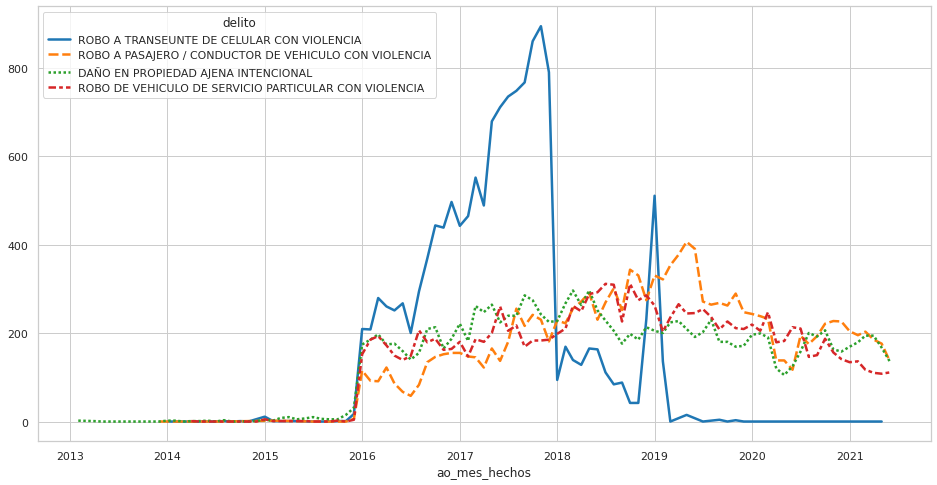

In [29]:
fig = plt.gcf()
fig.set_size_inches(16, 8)
sns.lineplot(data = delitos_wide_latest[delitos_mas_ocurrencia[21:25]].to_timestamp())
#plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left')

## Observaciones de la gráfica:

1. El delito de **robo a transeunte de celular con violencia** tuvo un crecimiento muy acelerado con un pico sumamente marcado a finales de 2018. Posterior a eso muestra una caída dramática y estabiliza un poco para crecer nuevamente a inicios de 2019. Llama mucho la atención que después de ese segundo crecimiento se reduce hasta tender a cero.
2. El resto de delitos presentaban una tendencia ligeramente creciente hasta inicios de 2019. Desde entonces muestra una tendencia a que parece ser a la baja.
5. Sin contar el delito de **robo a transeunte de celular con violencia**, el único que no se vio afectado por la contigencia sanitaria en Marzo 2020 fue **robo de vehículo de servicio particular con violencia** ya que no tiene un decremento muy marcado en ese punto del tiempo.

# 6. Análisis de carpetas por alcaldía

#### Primero se revisan cuantas alcaldías aparecen en el conjunto de datos.

In [30]:
df['alcaldia_hechos'].nunique()

549

#### Aparentemente se tienen 549 alcaldías, lo cuál es un dato inconsistente dado que la CDMX sólo tiene 16. Por esa razón se revisan los conteos por alcaldía de las primeras 25 ocurrencias.

In [31]:
df['alcaldia_hechos'].value_counts().head(25)

CUAUHTEMOC                194531
IZTAPALAPA                187860
GUSTAVO A MADERO          125218
BENITO JUAREZ             103368
ALVARO OBREGON             84863
COYOACAN                   83421
MIGUEL HIDALGO             81150
TLALPAN                    73185
VENUSTIANO CARRANZA        71799
AZCAPOTZALCO               60620
IZTACALCO                  51899
XOCHIMILCO                 39223
TLAHUAC                    30750
LA MAGDALENA CONTRERAS     20515
CUAJIMALPA DE MORELOS      18525
MILPA ALTA                  8958
NEZAHUALCOYOTL              1317
TLALNEPANTLA DE BAZ         1029
ECATEPEC DE MORELOS          956
NAUCALPAN DE JUAREZ          734
SIN DATO                     354
LA PAZ                       315
HUIXQUILUCAN                 278
CHALCO                       277
CHIMALHUACAN                 265
Name: alcaldia_hechos, dtype: int64

#### Se observa que los primeros 16 registros equivalen a las 16 alcaldía de la CDMX y algunos a municipios del Estado de México. Por esa razón se discriminan los registros que no pertenecen a la Ciudad de México.

#### Sin embargo, antes de discriminar registros, se debe conocer el nivel de ocurrencias en las 16 alcaldías de la CDMX y fuera de ellas. Para eso se genera una tabla de porcentaje acumulado desde la alcaldía con mayor ocurrencia hasta las de menor.

In [32]:
df['alcaldia_hechos'].value_counts(normalize = True).cumsum().rename_axis('alcaldía').reset_index(name = 'pct_acumulado').head(20)

,alcaldía,pct_acumulado
0,CUAUHTEMOC,0.156195
1,IZTAPALAPA,0.307034
2,GUSTAVO A MADERO,0.407575
3,BENITO JUAREZ,0.490573
4,ALVARO OBREGON,0.558712
5,COYOACAN,0.625693
6,MIGUEL HIDALGO,0.690851
7,TLALPAN,0.749614
8,VENUSTIANO CARRANZA,0.807263
9,AZCAPOTZALCO,0.855937


#### Se observa que en las 16 alcaldías de la CDMX se conserva el 99.23% de la muestra o 1,235,885 registros de 1,248,924. Se confirma que es seguro discriminar lo que no está en la CDMX.

In [33]:
df_alcaldias = df['alcaldia_hechos'].value_counts(normalize = True).cumsum().rename_axis('alcaldía').reset_index(name = 'pct_acumulado').head(16)
lista_alcaldias_cdmx = df_alcaldias['alcaldía'].values.tolist()
print(lista_alcaldias_cdmx)

['CUAUHTEMOC', 'IZTAPALAPA', 'GUSTAVO A MADERO', 'BENITO JUAREZ', 'ALVARO OBREGON', 'COYOACAN', 'MIGUEL HIDALGO', 'TLALPAN', 'VENUSTIANO CARRANZA', 'AZCAPOTZALCO', 'IZTACALCO', 'XOCHIMILCO', 'TLAHUAC', 'LA MAGDALENA CONTRERAS', 'CUAJIMALPA DE MORELOS', 'MILPA ALTA']


In [34]:
df_cdmx = df[df['alcaldia_hechos'].isin(lista_alcaldias_cdmx)]

#### Se determinan la cantidad de carpetas en cada alcaldía.

In [35]:
carpetas_alcaldia = df_cdmx['alcaldia_hechos'].value_counts().rename_axis('alcaldia_hechos').reset_index(name = 'carpetas_alcaldia').sort_values(by = 'alcaldia_hechos')
carpetas_alcaldia.reset_index(inplace = True, drop = True)
carpetas_alcaldia.head(20)

,alcaldia_hechos,carpetas_alcaldia
0,ALVARO OBREGON,84863
1,AZCAPOTZALCO,60620
2,BENITO JUAREZ,103368
3,COYOACAN,83421
4,CUAJIMALPA DE MORELOS,18525
5,CUAUHTEMOC,194531
6,GUSTAVO A MADERO,125218
7,IZTACALCO,51899
8,IZTAPALAPA,187860
9,LA MAGDALENA CONTRERAS,20515


#### Se determinan la cantidad de delitos únicos que aparecen en cada alcaldía.>

In [36]:
delitos_alcaldia = pd.DataFrame({'delitos_unicos_alcaldia' : df.groupby(['alcaldia_hechos'])['delito'].nunique()}).reset_index()
delitos_alcaldia = delitos_alcaldia[delitos_alcaldia['alcaldia_hechos'].isin(lista_alcaldias_cdmx)]
delitos_alcaldia.reset_index(inplace = True, drop = True)
delitos_alcaldia.head(20)

,alcaldia_hechos,delitos_unicos_alcaldia
0,ALVARO OBREGON,287
1,AZCAPOTZALCO,278
2,BENITO JUAREZ,284
3,COYOACAN,283
4,CUAJIMALPA DE MORELOS,239
5,CUAUHTEMOC,315
6,GUSTAVO A MADERO,297
7,IZTACALCO,266
8,IZTAPALAPA,307
9,LA MAGDALENA CONTRERAS,233


#### Se  hace un join de ambos dataframes y se obtienen:
1. Carpetas por alcaldía
2. Delitos únicos por alcaldía
3. Carpetas por delito único, por alcaldía

In [37]:
carpetas_delitos_cdmx = pd.merge(carpetas_alcaldia, delitos_alcaldia, how="outer", on=['alcaldia_hechos'])
carpetas_delitos_cdmx['carpetas_por_delito_alcaldia'] = carpetas_delitos_cdmx['carpetas_alcaldia'] / carpetas_delitos_cdmx['delitos_unicos_alcaldia']
carpetas_delitos_cdmx.head(50).sort_values(by = 'carpetas_alcaldia', ascending = False)

,alcaldia_hechos,carpetas_alcaldia,delitos_unicos_alcaldia,carpetas_por_delito_alcaldia
5,CUAUHTEMOC,194531,315,617.558730
8,IZTAPALAPA,187860,307,611.921824
6,GUSTAVO A MADERO,125218,297,421.609428
2,BENITO JUAREZ,103368,284,363.971831
0,ALVARO OBREGON,84863,287,295.689895
3,COYOACAN,83421,283,294.773852
10,MIGUEL HIDALGO,81150,286,283.741259
13,TLALPAN,73185,281,260.444840
14,VENUSTIANO CARRANZA,71799,268,267.906716
1,AZCAPOTZALCO,60620,278,218.057554


#### En este caso, Cuauhtémoc parece ser la alcaldía más insegura dado que tiene 194,531 carpetas y 315 delitos únicos. Esto es ~617 carpetas por delito. La alcaldía más segura parece ser Milpa Alta ya que tiene 8,958 carpetas  y 211 delitos únicos. Esto es ~42 carpetas por delito.

#### A continuación se construye una tabla de agregación de carpetas por alcaldía y delito. Con eso se calcurá la ocurrencia de delitos por alcaldía.

In [38]:
agregacion_delitos_alcaldias = pd.DataFrame({'conteo' : df_cdmx.groupby(['alcaldia_hechos','delito']).size()}).reset_index()
agregacion_delitos_alcaldias.head(15)

,alcaldia_hechos,delito,conteo
0,ALVARO OBREGON,ABANDONO DE PERSONA,141
1,ALVARO OBREGON,ABORTO,70
2,ALVARO OBREGON,ABUSO DE AUTORIDAD,155
3,ALVARO OBREGON,ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA P...,308
4,ALVARO OBREGON,ABUSO DE CONFIANZA,1434
5,ALVARO OBREGON,ABUSO SEXUAL,1177
6,ALVARO OBREGON,ACOSO SEXUAL,236
7,ALVARO OBREGON,ACOSO SEXUAL AGRAVADO EN CONTRA DE MENORES,8
8,ALVARO OBREGON,ALLANAMIENTO DE MORADA,169
9,ALVARO OBREGON,"ALLANAMIENTO DE MORADA, DESPACHO, OFICINA O ES...",161


#### Se genera un ranking de delitos por alcaldía de acuerdo a las ocurrencias. En este caso se filtra la tabla mediante un query para dejar solamente los 25 delitos más comunes por alcaldía.

In [39]:
delitos_mas_comunes = agregacion_delitos_alcaldias.assign(rank = agregacion_delitos_alcaldias.\
                                                          sort_values(['conteo'], ascending = False).\
                                                          groupby(['alcaldia_hechos']).cumcount()+1).\
                                                          query('rank <= 1000').\
                                                          sort_values(['alcaldia_hechos', 'rank'])

In [40]:
delitos_mas_comunes.head(10)

,alcaldia_hechos,delito,conteo,rank
286,ALVARO OBREGON,VIOLENCIA FAMILIAR,9694,1
10,ALVARO OBREGON,AMENAZAS,4921,2
78,ALVARO OBREGON,FRAUDE,4625,3
237,ALVARO OBREGON,ROBO DE OBJETOS,4437,4
169,ALVARO OBREGON,ROBO A NEGOCIO SIN VIOLENCIA,4364,5
217,ALVARO OBREGON,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,3824,6
239,ALVARO OBREGON,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,3219,7
178,ALVARO OBREGON,ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VI...,2651,8
48,ALVARO OBREGON,DENUNCIA DE HECHOS,2575,9
247,ALVARO OBREGON,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,2277,10


#### Se observan los 3 delitos más comunes por alcaldía y la cantidad de carpetas de los mismos.

In [41]:
delitos_mas_comunes.sort_values(['rank', 'alcaldia_hechos'], ascending = True, inplace = True)
delitos_mas_comunes.head(48)

,alcaldia_hechos,delito,conteo,rank
286,ALVARO OBREGON,VIOLENCIA FAMILIAR,9694,1
564,AZCAPOTZALCO,VIOLENCIA FAMILIAR,6123,1
644,BENITO JUAREZ,FRAUDE,10277,1
1131,COYOACAN,VIOLENCIA FAMILIAR,8451,1
1370,CUAJIMALPA DE MORELOS,VIOLENCIA FAMILIAR,2324,1
1462,CUAUHTEMOC,FRAUDE,19346,1
1982,GUSTAVO A MADERO,VIOLENCIA FAMILIAR,15172,1
2248,IZTACALCO,VIOLENCIA FAMILIAR,7589,1
2555,IZTAPALAPA,VIOLENCIA FAMILIAR,23540,1
2788,LA MAGDALENA CONTRERAS,VIOLENCIA FAMILIAR,4773,1


#### Se construye una matriz de alcaldías y delitos para corroborar qué similitudes hay en los delitos comunes por alcaldía.

In [42]:
delitos_mas_comunes_wide = delitos_mas_comunes.pivot('delito', 'alcaldia_hechos', 'rank')
delitos_mas_comunes_wide.head(100)

alcaldia_hechos,ALVARO OBREGON,AZCAPOTZALCO,BENITO JUAREZ,COYOACAN,CUAJIMALPA DE MORELOS,CUAUHTEMOC,GUSTAVO A MADERO,IZTACALCO,IZTAPALAPA,LA MAGDALENA CONTRERAS,MIGUEL HIDALGO,MILPA ALTA,TLAHUAC,TLALPAN,VENUSTIANO CARRANZA,XOCHIMILCO
delito,,,,,,,,,,,,,,,,
ABANDONO DE PERSONA,81.0,83.0,66.0,80.0,85.0,56.0,83.0,70.0,79.0,80.0,83.0,69.0,91.0,78.0,87.0,68.0
ABORTO,104.0,177.0,160.0,176.0,135.0,169.0,113.0,136.0,116.0,101.0,152.0,87.0,106.0,125.0,121.0,137.0
ABUSO DE AUTORIDAD,75.0,62.0,68.0,54.0,71.0,34.0,49.0,54.0,50.0,72.0,49.0,77.0,71.0,80.0,45.0,65.0
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA,44.0,52.0,53.0,52.0,48.0,40.0,48.0,42.0,41.0,40.0,48.0,38.0,53.0,63.0,39.0,52.0
ABUSO DE CONFIANZA,16.0,13.0,13.0,14.0,8.0,11.0,16.0,15.0,19.0,16.0,14.0,17.0,15.0,16.0,13.0,18.0
ABUSO SEXUAL,21.0,27.0,31.0,21.0,16.0,20.0,17.0,21.0,18.0,17.0,24.0,11.0,13.0,19.0,19.0,15.0
ACOSO SEXUAL,53.0,72.0,51.0,45.0,62.0,51.0,60.0,67.0,68.0,62.0,44.0,50.0,64.0,69.0,56.0,71.0
ACOSO SEXUAL AGRAVADO EN CONTRA DE MENORES,187.0,190.0,236.0,200.0,191.0,186.0,204.0,169.0,197.0,175.0,217.0,207.0,214.0,217.0,207.0,185.0
ALLANAMIENTO DE MORADA,66.0,58.0,63.0,69.0,47.0,94.0,75.0,68.0,74.0,63.0,70.0,48.0,67.0,58.0,77.0,51.0


## Observaciones de la tabla

1. El delito de **VIOLENCIA FAMILIAR** es el más común en 13 de las 16 alcaldías. En Miguel Hidalgo y Benito Juárez está en 5to lugar más común y en Cuauhtémoc está en 4to.
2. El delito de **AMENAZAS** es el 2do más común en 5 alcaldías y es top 10 en las 16 alcaldías.
3. El delito de **FRAUDE** es el más común en 3 alcaldías y es top 10 en las 16 alcaldías.
4. El delito de **ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA** es el 2do más común en Iztacalco e Iztapalapa, sin embargo, es el 15vo más común en Cuajimalpa y el 10mo más común en Tlalpan.
5. El delito de **ROBO DE ACCESORIOS DE AUTO** es el 2do más común en Benito Juárez, pero es el 24vo más común en Milpa Alta y el 19vo más común en Cuajimalpa.
6. El delito de **ROBO A NEGOCIO SIN VIOLENCIA** es el 2do más común en Gustavo A. Madero y Azcapotzalco, pero es el 14vo más común en Milpa Alta.
7. El delito **ROBO A CASA HABITACION SIN VIOLENCIA** es el 3ro más común en Milpa Alta, pero es el 15vo más común en Cuauhtémoc.
8. El delito **ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA** es el 5to más común en Xochimilco, pero ni siquiera aparece en el top 25 de los más comunes de Cuauhtémoc.
9. Los delitos **LESIONES CULPOSAS**, **LESIONES INTENCIONALES** y **LESIONES INTENCIONALES POR ARMA BLANCA** sólo pertenecen al top 25 de Milpa Alta.
10. El rubro **DELITOS AMBIENTALES** sólo aparece en los más relevantes para Milpa Alta y Xochimilco.
11. La **TENTATIVA DE EXTORSION** sólo es común en Azcapotzalco, Cuajimalpa y La Magdalena Contreras.
12. Sólo los delitos de **VIOLENCIA FAMILIAR** y **ROBO DE OBJETOS** son top 5 en todas las alcaldías.

## Preguntas de esta sección para el área titular, dueña de los datos o de negocio:

1. En los datos se encontraron los registros **DENUNCIA DE HECHOS**, **LA ADMINISTRACION DE JUSTICIA**, **DDH ANONIMAS**, **DDH CERESO**, **DDH FDS**, **DDH FRVT**, **DDH INCOMPETENCIA**, **DDH OFICIO COLABORACION**, **DDH OTRAS MATERIAS**, **DDH REDES**, **DDH RELACIONADAS** y **DDH SIN DATOS** en el campo de delito, ¿Qué tipo de registro son? ¿Efectivamente se trata de algún delito?
2. Hay delitos que sólo son comunes en una delegación, como **DESACATO** que sólo hay un registro en Gustavo A. Madero, ¿Esto es normal?

# 7. Creación de índice de seguridad

#### Se determina el número de colonias distintas de las que hay carpetas

In [43]:
df_cdmx['colonia_hechos'].nunique()

1641

#### Se determina el número de carpetas que hay por colonia de cada alcaldía

In [44]:
carpetas_colonia = pd.DataFrame({'carpetas_colonia' : df_cdmx.groupby(['alcaldia_hechos','colonia_hechos']).size()}).reset_index()
carpetas_colonia.head(20)

,alcaldia_hechos,colonia_hechos,carpetas_colonia
0,ALVARO OBREGON,19 DE MAYO,70
1,ALVARO OBREGON,1A AMPLIACIÓN PRESIDENTES,400
2,ALVARO OBREGON,1A VICTORIA,304
3,ALVARO OBREGON,1ER REACOMODO CORPUS CHRISTI,39
4,ALVARO OBREGON,2A AMPLIACIÓN EL PIRU,170
5,ALVARO OBREGON,2A AMPLIACIÓN JALALPA TEPITO,499
6,ALVARO OBREGON,2A AMPLIACIÓN LA MEXICANA,18
7,ALVARO OBREGON,2A AMPLIACIÓN PRESIDENTES,356
8,ALVARO OBREGON,2A SECCIÓN CAÑADA,79
9,ALVARO OBREGON,2A. AMPLIACION JALALPA EL GRANDE,263


#### Se determina el número de carpetas por delito por cada colonia

In [45]:
carpetas_delito_colonia = pd.DataFrame({'carpetas_delito' : df_cdmx.groupby(['alcaldia_hechos','colonia_hechos','delito']).size()}).reset_index()
carpetas_delito_colonia.head(20)

,alcaldia_hechos,colonia_hechos,delito,carpetas_delito
0,ALVARO OBREGON,19 DE MAYO,ABUSO SEXUAL,2
1,ALVARO OBREGON,19 DE MAYO,ALLANAMIENTO DE MORADA,1
2,ALVARO OBREGON,19 DE MAYO,"ALLANAMIENTO DE MORADA, DESPACHO, OFICINA O ES...",1
3,ALVARO OBREGON,19 DE MAYO,AMENAZAS,3
4,ALVARO OBREGON,19 DE MAYO,DAÑO EN PROPIEDAD AJENA CULPOSA,2
5,ALVARO OBREGON,19 DE MAYO,DAÑO EN PROPIEDAD AJENA INTENCIONAL,1
6,ALVARO OBREGON,19 DE MAYO,DESPOJO,3
7,ALVARO OBREGON,19 DE MAYO,FRAUDE,9
8,ALVARO OBREGON,19 DE MAYO,HOMICIDIO POR ARMA DE FUEGO,1
9,ALVARO OBREGON,19 DE MAYO,INSOLVENCIA ALIMENTARIA,1


#### Se determina el número de delitos únicos cada colonia

In [46]:
delitos_colonia = pd.DataFrame({'delitos_colonia' : carpetas_delito_colonia.groupby(['alcaldia_hechos','colonia_hechos']).size()}).reset_index()
delitos_colonia.head(20)

,alcaldia_hechos,colonia_hechos,delitos_colonia
0,ALVARO OBREGON,19 DE MAYO,33
1,ALVARO OBREGON,1A AMPLIACIÓN PRESIDENTES,62
2,ALVARO OBREGON,1A VICTORIA,71
3,ALVARO OBREGON,1ER REACOMODO CORPUS CHRISTI,24
4,ALVARO OBREGON,2A AMPLIACIÓN EL PIRU,44
5,ALVARO OBREGON,2A AMPLIACIÓN JALALPA TEPITO,83
6,ALVARO OBREGON,2A AMPLIACIÓN LA MEXICANA,15
7,ALVARO OBREGON,2A AMPLIACIÓN PRESIDENTES,72
8,ALVARO OBREGON,2A SECCIÓN CAÑADA,34
9,ALVARO OBREGON,2A. AMPLIACION JALALPA EL GRANDE,60


#### Se calcula un índice de carpetas por delito único para cada colonia

In [47]:
carpetas_delitos_colonia = pd.merge(delitos_colonia, carpetas_colonia, how = "outer", on=['colonia_hechos', 'alcaldia_hechos'])
carpetas_delitos_colonia['carpetas_por_delito_colonia'] = carpetas_delitos_colonia['carpetas_colonia'] / carpetas_delitos_colonia['delitos_colonia']
carpetas_delitos_colonia.head(20)
#carpetas_delitos_cdmx.head(50).sort_values(by = 'carpetas', ascending = False)

,alcaldia_hechos,colonia_hechos,delitos_colonia,carpetas_colonia,carpetas_por_delito_colonia
0,ALVARO OBREGON,19 DE MAYO,33,70,2.121212
1,ALVARO OBREGON,1A AMPLIACIÓN PRESIDENTES,62,400,6.451613
2,ALVARO OBREGON,1A VICTORIA,71,304,4.281690
3,ALVARO OBREGON,1ER REACOMODO CORPUS CHRISTI,24,39,1.625000
4,ALVARO OBREGON,2A AMPLIACIÓN EL PIRU,44,170,3.863636
5,ALVARO OBREGON,2A AMPLIACIÓN JALALPA TEPITO,83,499,6.012048
6,ALVARO OBREGON,2A AMPLIACIÓN LA MEXICANA,15,18,1.200000
7,ALVARO OBREGON,2A AMPLIACIÓN PRESIDENTES,72,356,4.944444
8,ALVARO OBREGON,2A SECCIÓN CAÑADA,34,79,2.323529
9,ALVARO OBREGON,2A. AMPLIACION JALALPA EL GRANDE,60,263,4.383333


Finalmente, se calcula un índice de inseguridad en el que se divide la razón de carpetas por delito a nivel alcaldía, entre la razón de carpetas por delito a nivel alcaldía. Esto entrega como resultado la **representatividad de cada colonia por delito y carpeta con respecto a la alcaldía**. Se entiende lo siguiente:

1. Mientras **más grande es el número**, significa que la representatividad es más pequeña y se puede asumir la que **la colonia es más segura**. 
2. Mientras **más pequeño es el número**, significa que la representatividad es más grande y se puede asumir la que **la colonia es más insegura**. 

#### Es necesario tener cuidado ya que en la muestra existen colonias en las que sólo existe un delito y una carpeta por lo que podría intepretarse como un sesgo.

### A continuación se muestran las 5 colonias más seguras

In [48]:
carpetas_delitos_colonia_alcaldia = pd.merge(carpetas_delitos_colonia, carpetas_delitos_cdmx, how = "outer", on=['alcaldia_hechos'])
carpetas_delitos_colonia_alcaldia['indice_inseguridad'] = carpetas_delitos_colonia_alcaldia['carpetas_por_delito_alcaldia'] / carpetas_delitos_colonia_alcaldia['carpetas_por_delito_colonia']
carpetas_delitos_colonia_alcaldia.sort_values(by = 'indice_inseguridad', ascending = False).head(5)

,alcaldia_hechos,colonia_hechos,delitos_colonia,carpetas_colonia,carpetas_por_delito_colonia,carpetas_alcaldia,delitos_unicos_alcaldia,carpetas_por_delito_alcaldia,indice_inseguridad
643,CUAUHTEMOC,SAN MIGUEL CHAPULTEPEC,1,1,1.0,194531,315,617.55873,617.55873
653,CUAUHTEMOC,ZONA CENTRO,2,2,1.0,194531,315,617.55873,617.55873
622,CUAUHTEMOC,CENTRO (ÁREA 5),1,1,1.0,194531,315,617.55873,617.55873
636,CUAUHTEMOC,NICOLÁS BRAVO,1,1,1.0,194531,315,617.55873,617.55873
649,CUAUHTEMOC,TLATILCO,1,1,1.0,194531,315,617.55873,617.55873


### Y las 5 colonias más inseguras

In [49]:
carpetas_delitos_colonia_alcaldia.sort_values(by = 'indice_inseguridad', ascending = True).head(5)

,alcaldia_hechos,colonia_hechos,delitos_colonia,carpetas_colonia,carpetas_por_delito_colonia,carpetas_alcaldia,delitos_unicos_alcaldia,carpetas_por_delito_alcaldia,indice_inseguridad
620,CUAUHTEMOC,CENTRO,256,40788,159.328125,194531,315,617.558730,3.876018
853,IZTACALCO,AGRÍCOLA ORIENTAL,206,10134,49.194175,51899,266,195.109023,3.966100
598,CUAJIMALPA DE MORELOS,LOMAS DE SANTA FE,131,2550,19.465649,18525,239,77.510460,3.981910
384,BENITO JUAREZ,DEL VALLE CENTRO,212,18053,85.155660,103368,284,363.971831,4.274194
580,CUAJIMALPA DE MORELOS,CUAJIMALPA,164,2762,16.841463,18525,239,77.510460,4.602359


## Graficando histogramas del índice de seguridad para cada alcaldía

<AxesSubplot:xlabel='indice_inseguridad', ylabel='Count'>

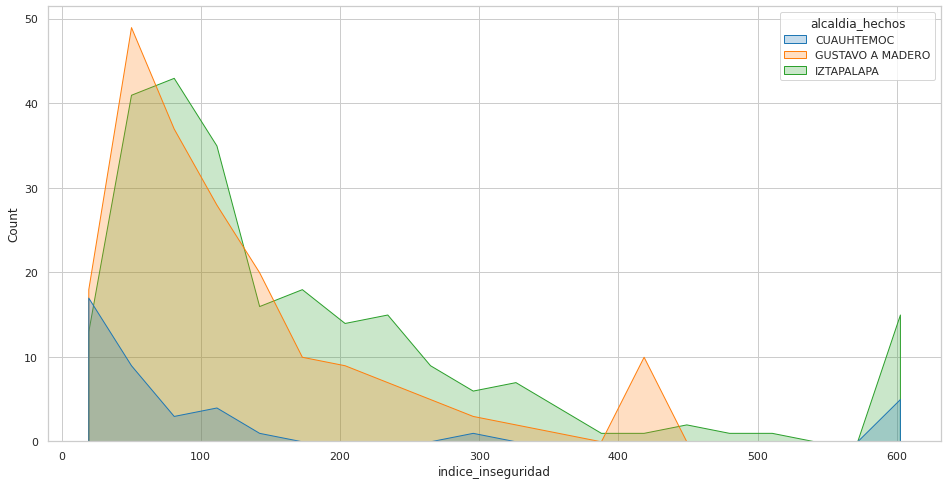

In [50]:
fig = plt.gcf()
fig.set_size_inches(16, 8)
sns.histplot(data = carpetas_delitos_colonia_alcaldia[carpetas_delitos_colonia_alcaldia['alcaldia_hechos'].isin(lista_alcaldias_cdmx[0:3])],
             x = "indice_inseguridad", hue="alcaldia_hechos", element = 'poly')

<AxesSubplot:xlabel='indice_inseguridad', ylabel='Count'>

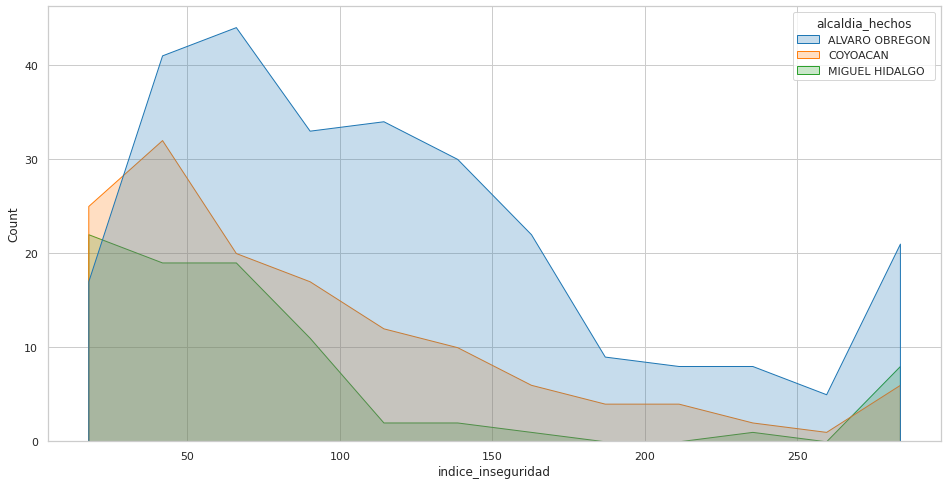

In [51]:
fig = plt.gcf()
fig.set_size_inches(16, 8)
sns.histplot(data = carpetas_delitos_colonia_alcaldia[carpetas_delitos_colonia_alcaldia['alcaldia_hechos'].isin(lista_alcaldias_cdmx[4:7])],
             x = "indice_inseguridad", hue="alcaldia_hechos",  element="poly")

<AxesSubplot:xlabel='indice_inseguridad', ylabel='Count'>

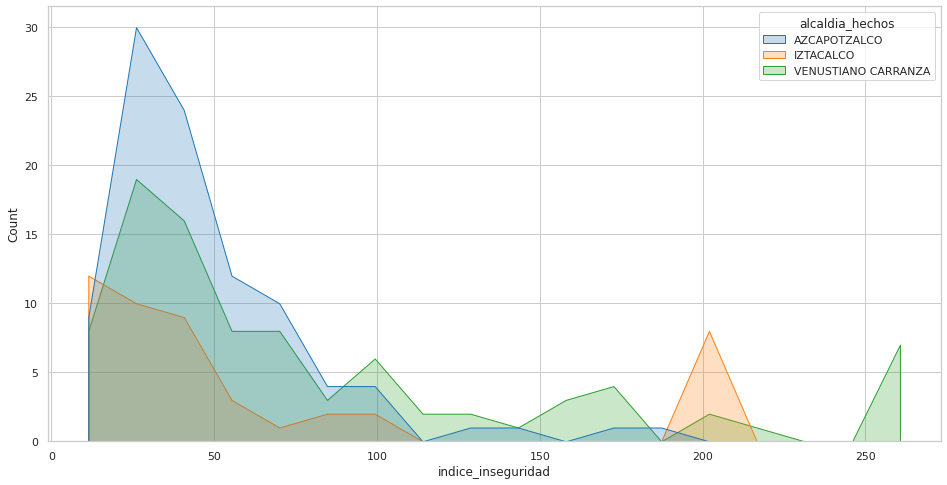

In [52]:
fig = plt.gcf()
fig.set_size_inches(16, 8)
sns.histplot(data = carpetas_delitos_colonia_alcaldia[carpetas_delitos_colonia_alcaldia['alcaldia_hechos'].isin(lista_alcaldias_cdmx[8:11])],
             x = "indice_inseguridad", hue="alcaldia_hechos",  element="poly")

<AxesSubplot:xlabel='indice_inseguridad', ylabel='Count'>

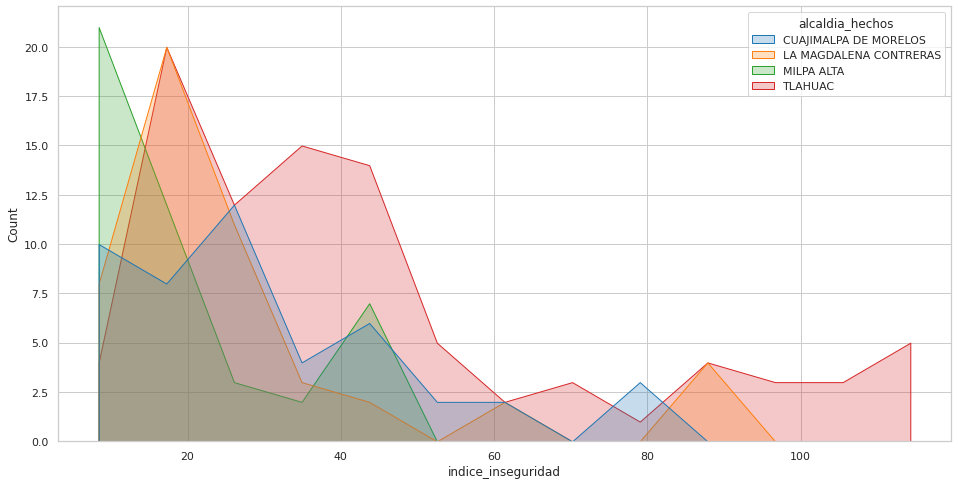

In [53]:
fig = plt.gcf()
fig.set_size_inches(16, 8)
sns.histplot(data = carpetas_delitos_colonia_alcaldia[carpetas_delitos_colonia_alcaldia['alcaldia_hechos'].isin(lista_alcaldias_cdmx[12:16])],
             x = "indice_inseguridad", hue="alcaldia_hechos", element="poly")

## Observaciones de las gráficas:

1. Las colonias más seguras están en Cuauhtémoc e Iztapalapa, sin embargo, las mayor cantidad de colonias inseguras están también en esas alcaldías junto con Gustavo A. Madero.
2. Las colonias más inseguras se encuentran en Cuajimalpa, Iztacalco, Benito Juárez y, paradójicamente, en Cuauhtémoc (Que también tiene de las más seguras).
3. Los índices de inseguridad en las alcaldías Álvaro Obregón, Coyoacán y Miguel Hidalgo son mayoritariamente pequeños, sin embargo tienen una distribución menos uniforme y también tienen una importante cantidad de colonias con índices altos.
4. Los índices de inseguridad en las alcaldías Azcapotzalco, Iztacalco y Venustiano Carranza son bajos en su mayoría. La intepretación es que la representatividad se coloca en unas cuantas colonias que concentran la mayoría de carpetas por delito.
5. Los índices de inseguridad son más pequeños en las colonias de las alcaldías Cuajimalpa, La Magdalena Contreras, Milpa Alta y Tláhuac, lo cuál se entiende que son delegaciones más seguras.

## Promedio de índice de inseguridad por alcaldía

In [54]:
carpetas_delitos_colonia_alcaldia.groupby('alcaldia_hechos')['indice_inseguridad'].mean().sort_values()

alcaldia_hechos
MILPA ALTA                 18.577687
LA MAGDALENA CONTRERAS     27.073567
CUAJIMALPA DE MORELOS      29.033170
TLAHUAC                    44.337997
AZCAPOTZALCO               47.622733
XOCHIMILCO                 61.788687
IZTACALCO                  62.672258
MIGUEL HIDALGO             78.097442
VENUSTIANO CARRANZA        82.448239
BENITO JUAREZ              85.540780
COYOACAN                   90.251154
TLALPAN                   103.552587
ALVARO OBREGON            118.895078
GUSTAVO A MADERO          123.416843
CUAUHTEMOC                124.465385
IZTAPALAPA                170.832595
Name: indice_inseguridad, dtype: float64

### Con esto, se concluye que las 3 alcaldías más seguras son Milpa Alta, La Magdalena Contreras y Cuajimalpa, mientras que las 3 más inseguras son Iztapalapa, Cuauhtémoc y Gustavo A. Madero.

## Preguntas de esta sección para el área titular, dueña de los datos o de negocio:

1. ¿Es normal que existan colonias en las que sólo hay una carpeta?
2. Si la CDMX en sus 16 alcaldías tiene, aproximadamente, 1,700 colonias y en los datos aparecen 1,641, ¿Podemos asumir que las ~59 restantes tienen índices de inseguridad muy bajos dado que no se reportan carpetas?